# Customer Propensity Modeling Project
June 26, 2021 | Completed by Tyler Shannon

## Project Scope


### Business Context
Imagine that you have been tasked with helping a marketing executive at a large bank understand
which characteristics of potential customers are the best predictors of purchasing of one of the bank’s
products.
<br>
<br>
Ultimately, the client is interested in using a predictive model to score each potential customer’s
propensity to purchase, as well as understanding which customer characteristics are most important in
driving purchasing behavior, in order to inform future marketing segmentation personalization, etc.

### The Dataset
For this project, use the specific dataset bank-additional-full.csv available at https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
<br>
Note: This dataset contains the outcome variable (y) but you are not limited to using only this dataset
for this project

### The Task
Write a Python script that predicts the binary outcome (y = customer subscribed or not)
<br>

* Your code should minimally include the following steps:
    * Any data exploration, preprocessing, and feature engineering steps that you believe are appropriate: show off your data wrangling/manipulation skills here (tidyverse especially)
    * Fit at least 2 models using substantively different machine learning algorithms/APIs
    * Evaluation of model fit for training and test data to justify selection of final (production) model

* Bonus: Demonstrate your understanding of a standard ML development pipeline, such as tidy-models, spark/sparklyr, keras, etc.

## Exploratory Data Analysis (EDA)

### Basic data statistics

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Load Data
df_raw = pd.read_csv('./data/bank-full.csv', delimiter=';')
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


First we look at the basic anatomy of the dataset.

In [8]:
df_raw.shape

(45211, 17)

In [9]:
df_raw.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
len(df_raw)

45211

In [12]:
len(df_raw.drop_duplicates())

45211

From this first look, we see that we are working with a mix of continuous and categorical variables. We also see that the dataset is not missing any data and there are no duplicate records.

The fact that we are dealing with mixed types, indicates taht we'll need to do some feature engineering, likely one-hot-encoding of the categorical variables.

### What is the distribution of subscribers?

In [13]:
print( "{:.2f}% of the data represents customers who subscribed: {}"
      .format((df_raw['y'].value_counts()['yes'])/len(df_raw)*100, df_raw['y'].value_counts()['yes']))

print( "{:.2f}% of the data represents customers who did not subscribe: {}"
      .format((df_raw['y'].value_counts()['no'])/len(df_raw)*100, df_raw['y'].value_counts()['no']))

11.70% of the data represents customers who subscribed: 5289
88.30% of the data represents customers who did not subscribe: 39922


Here we notice that there is an imbalance in the dataset, where a majority of our records are classigied as non-subscribers. This puts the subscriber class in the minority. This is important because certain algorithms will place too much emphasis on the majority class. We'll need to address this. We could undersample the majorty class to make the dataset more even but that may result in some information loss. Instead, I think I will attempt to oversample the minority class, keeping in mind that this could result in overfitting. Something for us to keep in mind.

### EDA Summary
* As noted above, we're working with imbalanced data, which will negatively impact our classification model. So I'll perform a random oversampling of the subscriber class to make the dataset more balanced.
* In the preprocessing steps, I'll one-hot-encode the categorical data.
* Because we are tasked with feature selection, I'll first use a decision tree classification model since decision trees naturally lend themselves to feature selection.
* I also plan to use a logistic regression algorithm


## Data Preprocessing

First, let's convert our target variable from a string to 0/1 where 0 represents no, and 1 represents yes

In [15]:
df = df_raw.copy()

df['y'] = df['y'].replace({'no':0,'yes':1})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


We'll start by doing a random over-sampling of the subscriber class so we can acheive a more balanced dataset

In [16]:
import importlib
import ixis #helper functions
importlib.reload(ixis)

df_over_sample = ixis.random_over(df, 'y', ratio=1).reset_index(drop=True)

print("Original data length: {}".format(len(df)))
print("Over-sampled length: {}".format(len(df_over_sample)))

print( "{:.2f}% of the data represents customers who subscribed: {}"
      .format((df_over_sample['y'].value_counts()[1])/len(df_over_sample)*100, df_over_sample['y'].value_counts()[1]))

print( "{:.2f}% of the data represents customers who did not subscribe: {}"
      .format((df_over_sample['y'].value_counts()[0])/len(df_over_sample)*100, df_over_sample['y'].value_counts()[0]))

Original data length: 45211
Over-sampled length: 79844
50.00% of the data represents customers who subscribed: 39922
50.00% of the data represents customers who did not subscribe: 39922


In [17]:
#feature engineering
#compress jobs into less categories
df_over_sample['job'] = df_over_sample["job"].replace({'admin':'office', 
                                                       'entrepreneur':'office',
                                                       'management':'office',
                                                       'housemaid':'services'})

df_over_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,office,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,office,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Next, we'll one-hot encode our categorical variables

In [18]:
importlib.reload(ixis)

X = df_over_sample.iloc[:, :-1]
y = df_over_sample.iloc[:, -1:]

X = X.drop(['duration'], axis=1)

cat_columns = ['job','marital','education','default','housing','loan','contact', 'poutcome', 'day', 'month']

X = ixis.encode_variables(X, cat_columns)

X

,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_office,job_retired,job_self-employed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,1,-1,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,29,1,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,2,1,-1,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,1506,1,-1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,1,1,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,28,909,1,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
79840,36,994,1,90,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79841,45,2040,1,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79842,32,491,7,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#drop binary columns
X = X.drop(['default_no', 'housing_no', 'loan_no'], axis=1)

Split our data into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63875, 75)
(15969, 75)
(63875, 1)
(15969, 1)


## Modeling
Now that our data is processesed and prepped for modeling, we'll start with a decision tree classifier. I'm starting with this model because decision trees naturally help with feature selection.

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=40)
dt_clf = dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth = 4, random_state=40)
rf_clf = rf_clf.fit(X_train, np.ravel(y_train))
rf_pred = rf_clf.predict(X_train)

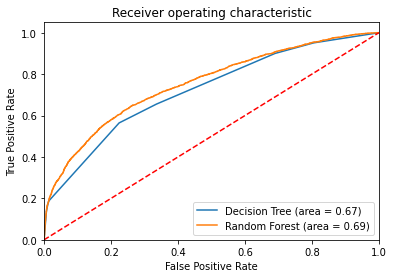

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

dt_roc_auc = roc_auc_score(y_test, dt_clf.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_clf.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf_clf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Our decision tree and random forest models appear to performing with nearly the same AUC ROC. For simplicity, we'll move forward with the decision tree

In [26]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

def print_tree(tree):
    dot_data = StringIO()
    
    export_graphviz(tree, out_file=dot_data, filled=True, 
                    rounded=True, feature_names=X.columns, 
                    class_names=['no','yes'])
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return Image(graph.create_png())
    

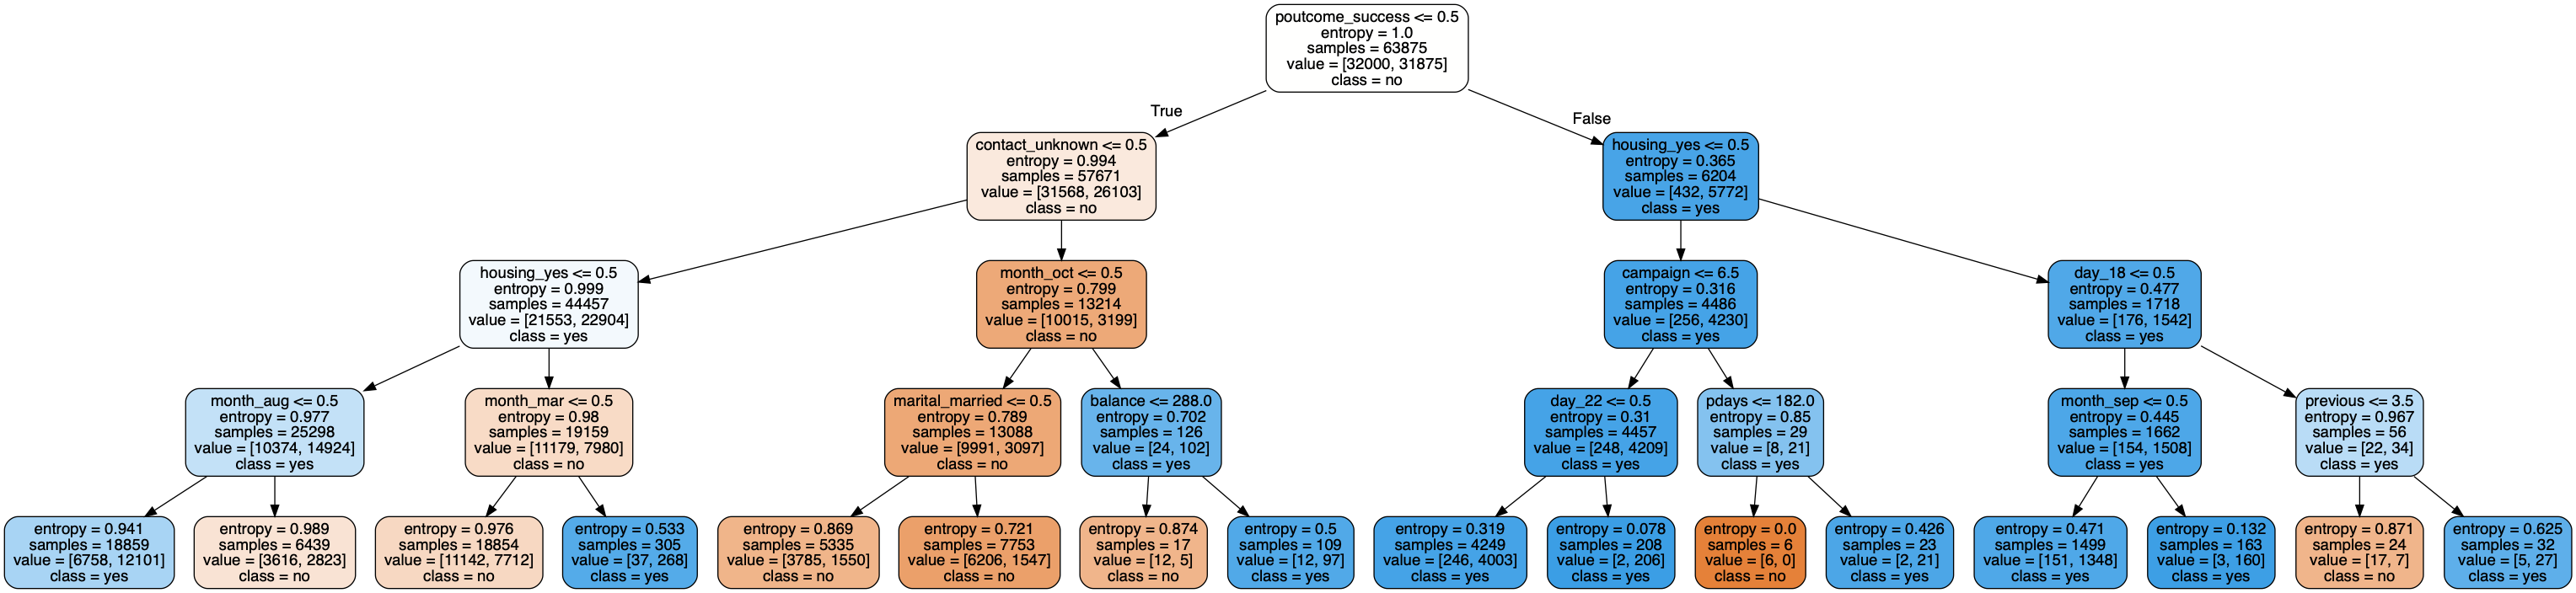

In [27]:
print_tree(dt_clf)

In [29]:
dt_clf_feature_importance = pd.DataFrame.from_dict(dict(zip(X.columns, dt_clf.feature_importances_)), 
                                                orient='index', 
                                                columns=['importance']).sort_values(ascending=False, 
                                                                                    by='importance')
dt_clf_feature_importance.head(10)

,importance
poutcome_success,0.493724
contact_unknown,0.265159
housing_yes,0.111819
month_aug,0.066816
month_mar,0.023784
month_oct,0.015026
marital_married,0.011819
day_18,0.002834
balance,0.002188
pdays,0.001697


### Decision Tree Interpretation

The results of our decision tree suggest a few things:
* Our decision tree and random forest models are performing with nearly the same AUC with the random forest model performing slightly better. We'll choose the decision tree for simplicity of client explanation.
* The success of previous marketing initiative is a good inidicator as to whether someone will subscribe. Our tree is telling us that if there is a past success, the customer is more likely to subscribe. In a business context this suggests that marketers should place high value on existing contacts to help drive future subscriptions.
* It also appears that age, house loan status, marital status and bank account balance are other good indicators of subscriptions.
* It appears that spring and fall are better times for subscription conversions.


With these results from the decision tree suggesting some important features, I'll use those features to build a logistic regression classification algorithm

### Logistic Regression

In [31]:
#Narrow our data two only a few features
X1 = X[['poutcome_success', 'housing_yes', 'marital_married', 'balance']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=40, max_iter=2000)
lr = lr.fit(X1_train, np.ravel(y1_train))

lr_pred = lr.predict(X1_test)


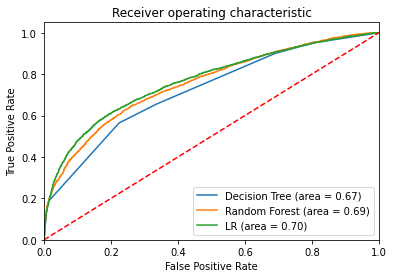

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_roc_auc = roc_auc_score(y1_test, lr.predict(X1_test))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y1_test, lr.predict_proba(X1_test)[:,1])

plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(lr_fpr, lr_tpr, label='LR (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<AxesSubplot:>

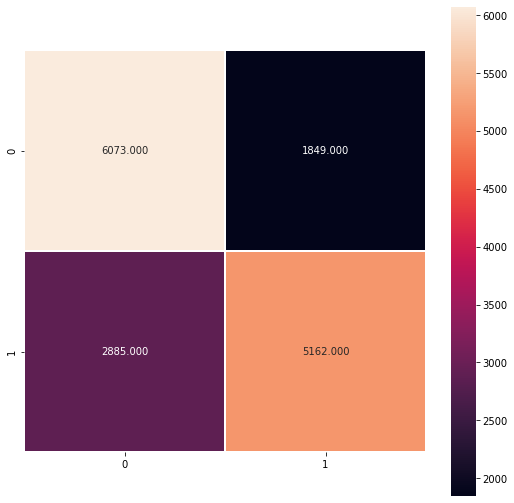

In [34]:
cm = metrics.confusion_matrix(y1_test, lr_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)

### Logistic Regression Interpretation

Using features determined as importatnt from decision tree, the LR model outperforms both the decision tree and random forest based on the AUC ROC metric. We'll build a pipline for the LR model moving forward